In [1]:
from keras.datasets import mnist
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy

%matplotlib inline

print(tf.__version__)

2.15.0


This is for importing libraries and checking the Tensorflow version

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


X_train is the dataset for training handwritten images

y_train is the label (output) of X_train

X_test is the dataset for testing handwritten images

y_test is the label (output) of X_test

In [3]:
input_shape = (28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) / 255.0

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) / 255.0

The data is now normalized and reshaped

In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

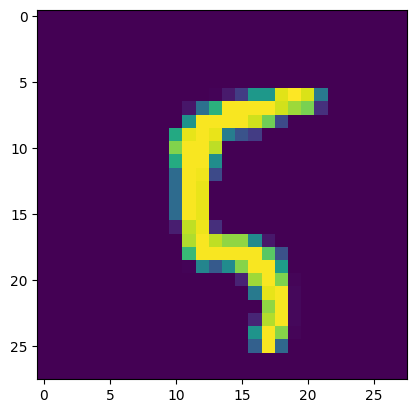

In [5]:
plt.imshow(X_train[100][:,:,0])

Example image

In [6]:
print(y_train[100])

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


This array holds the numeric value of the image

In [7]:
batch_size = 128
epochs = 20
num_classes = 10

Important features before applying CNN

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

The summary of the model + 2 CNN layers

In [9]:
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Compiling the model to screw the data


In [11]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          verbose=1,
          epochs=epochs,
          validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 171s 365ms/step - loss: 0.1565 - accuracy: 0.9538 - val_loss: 0.0472 - val_accuracy: 0.9843
Epoch 2/20
469/469 [==============================] - 156s 333ms/step - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0357 - val_accuracy: 0.9889
Epoch 3/20
469/469 [==============================] - 151s 322ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 4/20
469/469 [==============================] - 148s 316ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0328 - val_accuracy: 0.9886
Epoch 5/20
469/469 [==============================] - 150s 320ms/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 6/20
469/469 [==============================] - 153s 327ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0296 - val_accuracy: 0.9898
Epoch 7/20
469/469 [==============================] - 157s 335ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0278 -

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.0281 - accuracy: 0.9933


[0.0280600618571043, 0.9933000206947327]